<a href="https://colab.research.google.com/github/AllaSalmina/network-analysis/blob/master/HW2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 font color = 'black'>Network Analysis. Home Assignment</h1>
<h2>By Eric George Parakal, Kseniya Kuzmina and Alla Salmina</h2>

<h3>1. Problem Definition</h3>

We consider the problem of analyzing the interactions between various characters of the French historical novel Les Misérables by Victor Hugo and by doing so able to understand the importance of each character in relation to the plot. The problem will be interested for those, who likes this novel and its numerous adaptations for film, television and the stage, including a musical. 

Also this work can be considered as a proxy to social network analysis in a fictional setting. The dataset is available from the link:http://www-personal.umich.edu/~mejn/netdata/   , but it turned out that it can be obtained from the networkx library by directly calling the command networkx.les_miserables_graph()

We made the work using Gephi and Python library networkx.



<h3>2. Visualization of Data</h3>

The network data is visualized as follows:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import _naive_greedy_modularity_communities

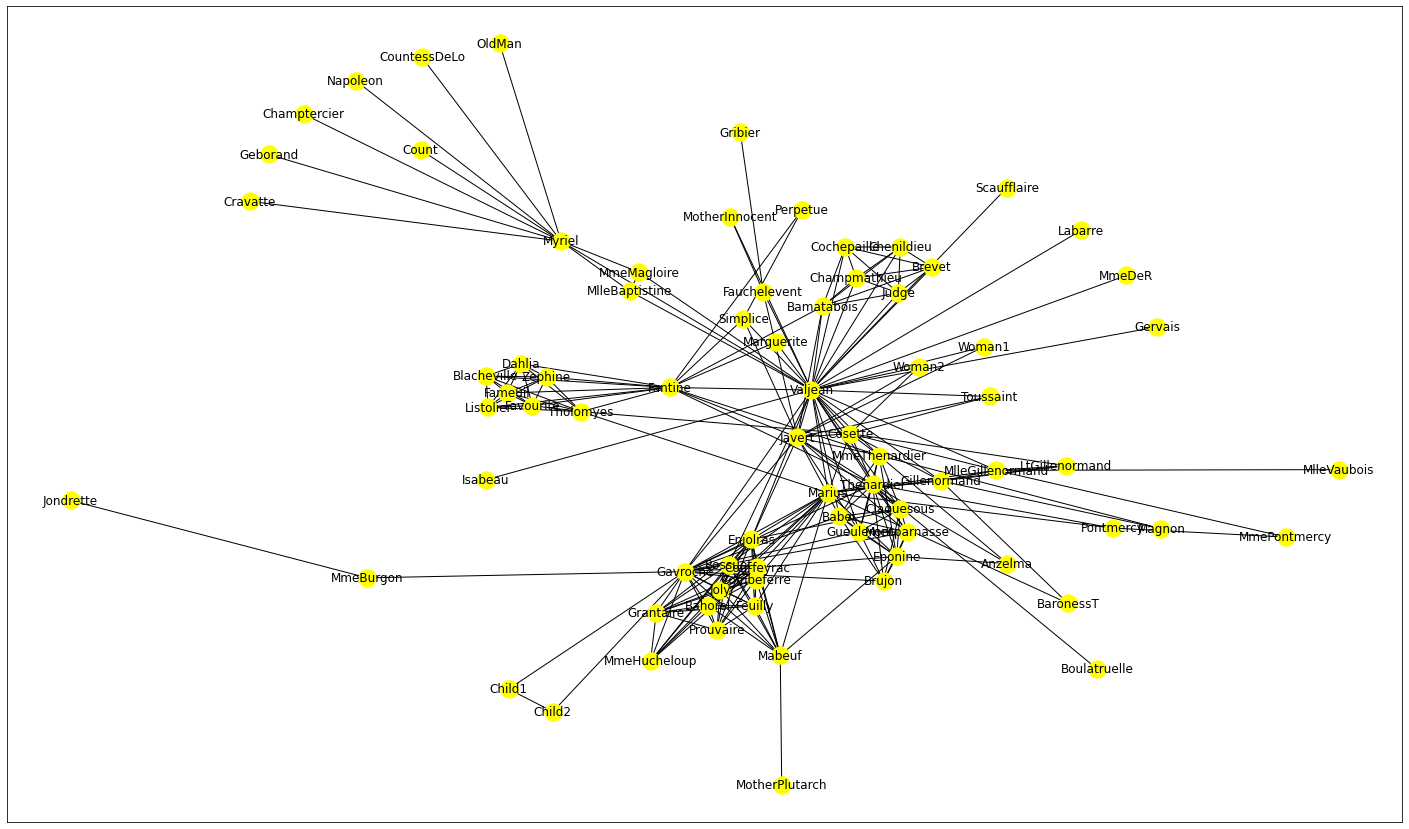

In [ ]:
G = nx.les_miserables_graph()
plt.figure(1, figsize=(25,15))

nx.draw_networkx(G, pos=nx.spring_layout(G, seed=675), with_labels=True, node_color='yellow')

<h3>3. Descriptive Statisitcs</h3>

In [ ]:
print(f'Number of nodes:{len(G.nodes())}')
print(f'Number of edges:{len(G.edges())}')
print(f'Network density:{nx.density(G)}')

Number of nodes:77
Number of edges:254
Network density:0.08680792891319207


From this we understand that despite there being 77 prominent characters, since there are only 254 edges in total.

<b> Main metrics of the network (using Gephi): </b>
*   Average degree -	3.299
*   Average Weighted Degree -	10.649
*   Network Diameter - 5
*   Radius - 0
*   Average Path length	- 2.4
*   HITS	Ε = 1.0E-4
*   Number of Weakly Connected Components -	1
*   Number of Strongly Connected Components	77
*   Number of Strongly Connected Components	77
*   Новый пункт

Node Overview:
*   Average Clustering Coefficient: 0.287	
*   Eigenvector Centrality (Sum change)	0.01167

Edge Overview:	
*   Average Path length	2.4








The average degree is 3.299. In other words, on average one person has just over 3 contacts. 
The degree distribution graph shows that there are very few people who have more than 15 connections. The weighting below shows how it is changing the degree distribution. The average degree after weighting is 10.6.


Unweighted Data: <br>
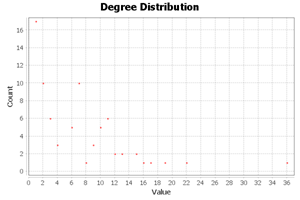

Weighted Data: <br>
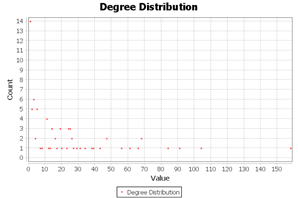


Comments: “value” is the number of connections.

According to the network diameter the longest distance between people is 5. Thus, any two people can communicate with each other not more than via 5 connections. Our network is quite dense (average path length – 2.4). Almost all people know each other in an average of 2.4 "handshakes". The graph is far from being complete, since the graph density is 0.086.

The distribution of PageRank is presented below. The distribution shows that most people are approximately equally “important”, and only two people are most “important” on the network. Thus, these two people have the highest probability that a random walk lands on the node after K random steps. <br>
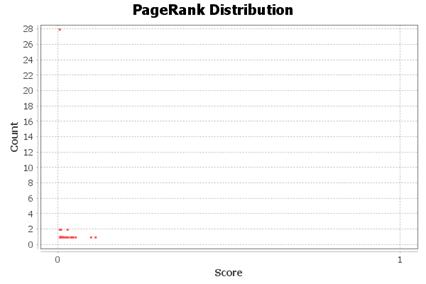

Comments: Parameters: Epsilon = 0.001. Probability = 0.85.

<h3>4. Network Analysis</h3>

In order to find out who are the important characters of the novel, we calculate three centrality measures:

i) Degree centrality
ii) Eigenvector centrality
and iii) Closeness centrality

<h4>Degree centrality</h4>

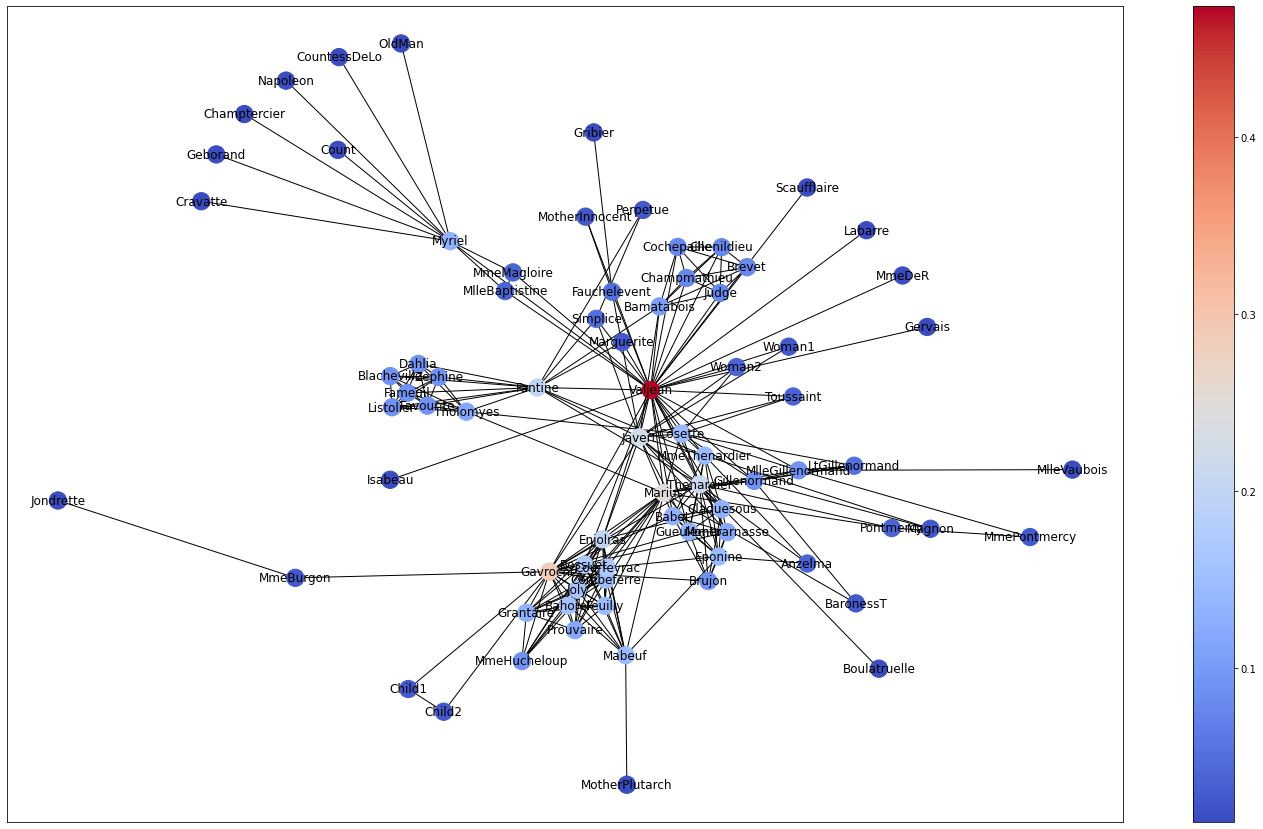

In [ ]:
vmin = min(list(nx.degree_centrality(G).values()))
vmax = max(list(nx.degree_centrality(G).values()))
cmap = plt.cm.coolwarm

plt.figure(1, figsize=(25,15))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=675), with_labels=True, node_color=list(nx.degree_centrality(G).values()), cmap=cmap, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)

As is illustrated by the figure above, the node with the highest degree centrality is Valjean, who is the protagonist of the novel, which explains his high degree centrality indicating his central role in the book as the main character and his role as broker between different characters. He has more direct connections with other characters than the others. 

<h4>Eigenvector centrality</h4>

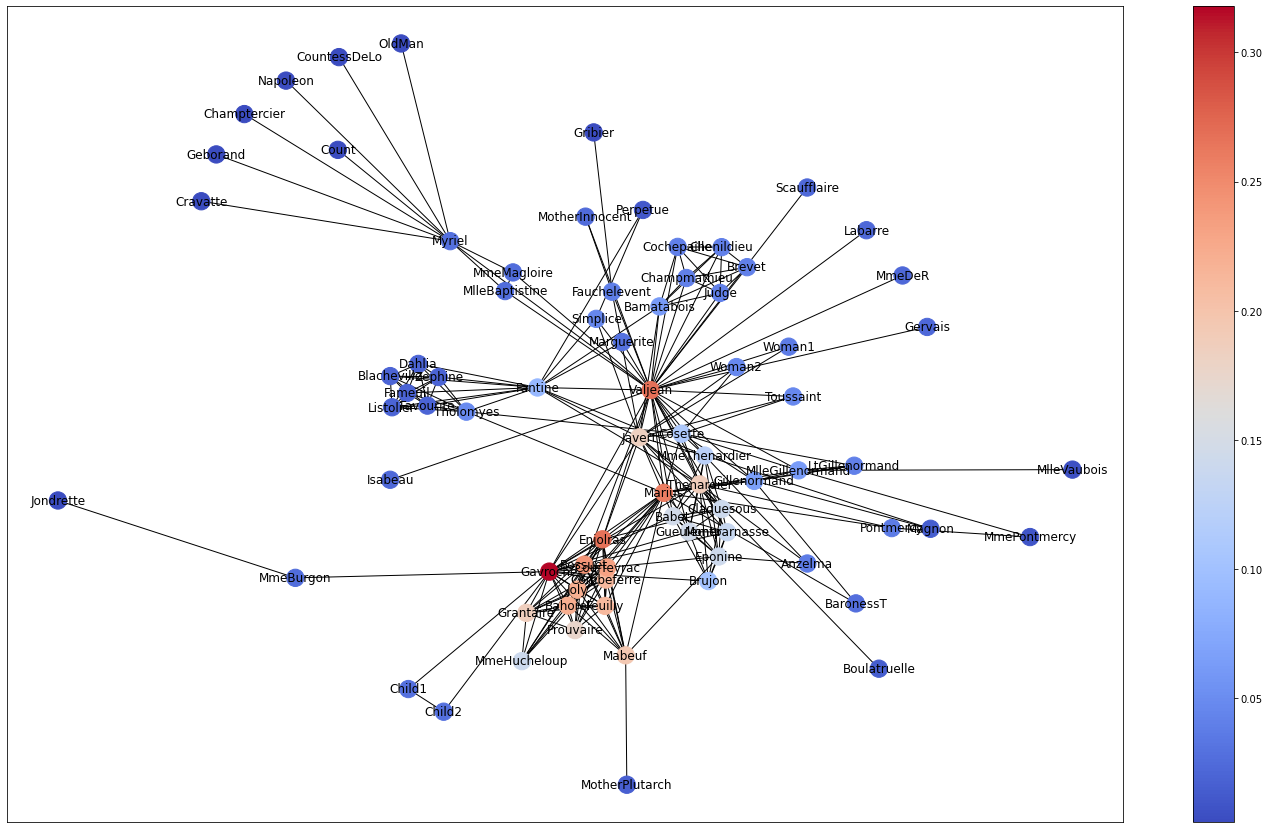

In [ ]:
vmin = min(list(nx.eigenvector_centrality(G).values()))
vmax = max(list(nx.eigenvector_centrality(G).values()))
cmap = plt.cm.coolwarm

plt.figure(1, figsize=(25,15))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=675), with_labels=True, node_color=list(nx.eigenvector_centrality(G).values()), cmap=cmap, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)

The node with the highest Eigenvector centrality is that of Gavroche, a young street urchin who acts as an unofficial courier linking many other characters together, thereby his connection to many other nodes who themselves have a high score.

<h4>Closeness Centrality</h4>

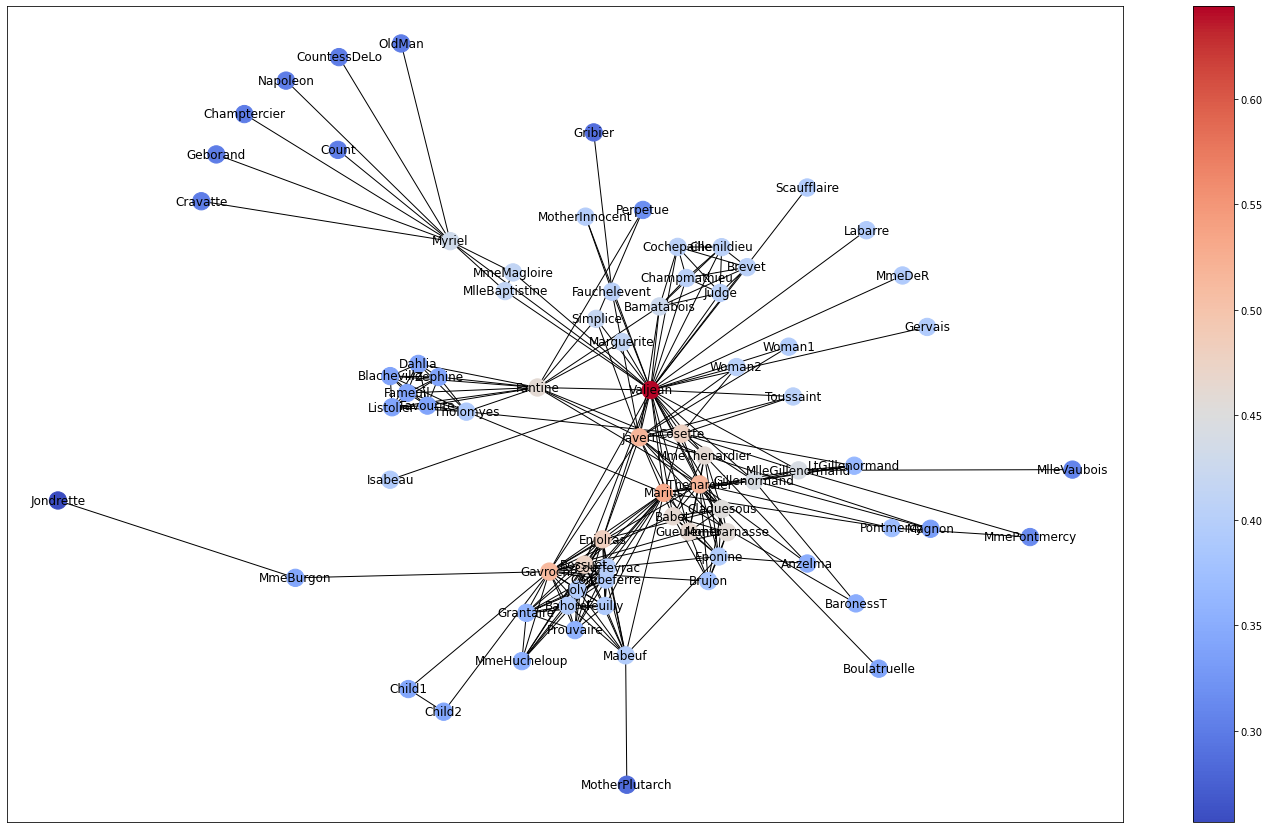

In [ ]:
vmin = min(list(nx.closeness_centrality(G).values()))
vmax = max(list(nx.closeness_centrality(G).values()))
cmap = plt.cm.coolwarm

plt.figure(1, figsize=(25,15))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=675), with_labels=True, node_color=list(nx.closeness_centrality(G).values()), cmap=cmap, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)

The node with the highest Closeness Centrality is that of Valjean, as him being the central character of the novel means that he is close to many other characters and can be considered as a good "broadcaster" and influencer.

We then look at the existence of any communities in the network

<h4>Communities</h4>

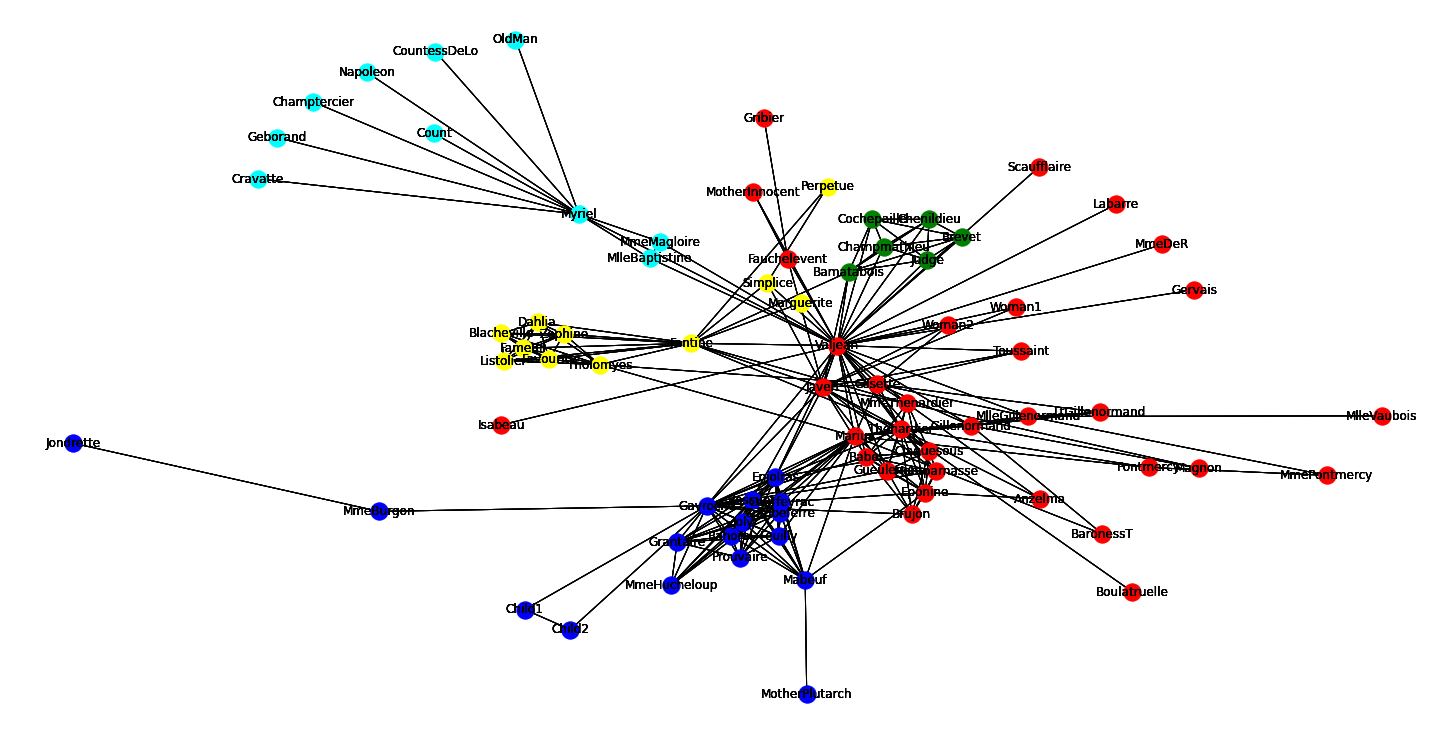

In [ ]:
communities = list(_naive_greedy_modularity_communities(G))

colors = ["red", "blue", "yellow", "cyan", "green", "indigo", "pink", "grey"]

plt.figure(1, figsize=(20,10))

for i in range(len(communities)):
    graph = communities[i]
    nx.draw(G, pos=nx.spring_layout(G, seed=675), nodelist=[node for node in graph], node_color=colors[i%10], with_labels=True)

There exists 5 distinct communities when dividing based on the naive implementation of the greedy modularity algorithm, with the biggest community in terms of number of nodes being centered around Valjean.

<h3>5. Conclusion</h3>

Analyzing the network, we computed centrality measures like degree centrality, closeness centrality and eigenvector centrality that aim to find the most important nodes in a network (depending on a different notions of “important”). In our case the most important characters are Valjean and Gavroche. They are the influencers in the network. Also we checked whether there any communities or not. It turned out the network includes 5 communities. There are two comparatively large communities and three small ones, and the biggest community is centered around Valjean.
